In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from datetime import timedelta
# import measures

In [2]:
%matplotlib inline

## Data Collection

In [3]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)

    return tickers

In [4]:
tickers = save_sp500_tickers()

In [5]:
tickers = list(map(lambda x: x.replace('\n', ''), tickers))

In [3]:
price_table = pd.read_csv('prices.csv', index_col=0)
price_table.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-31,54.158398,12.739085,NaN,6.99,19.636719,3.045087,19.508415,14.90,25.577316,7.280872,...,59.231983,15.456899,8.669735,27.330851,NaN,9.113444,44.246666,65.001007,47.138226,NaN
2004-01-02,53.101070,12.780089,NaN,7.00,19.338285,3.142075,19.518400,14.86,25.583614,7.311727,...,59.996933,15.650038,8.664631,27.245951,NaN,8.882961,43.586666,64.631683,46.262157,NaN
2004-01-05,54.113800,12.780089,NaN,6.91,19.890385,3.123681,19.867832,15.20,25.351082,7.458268,...,60.153389,15.837661,8.664631,28.123247,NaN,9.012777,43.666668,64.050018,46.162266,NaN
2004-01-06,53.948200,12.687147,NaN,6.99,19.659101,3.138731,19.887802,15.61,25.803566,7.504542,...,60.918354,15.600375,8.664631,27.946375,NaN,9.282997,43.766666,63.736057,46.800102,NaN
2004-01-07,53.018284,12.821095,NaN,7.16,19.211456,3.076859,19.694550,15.66,26.614231,7.751354,...,61.457306,15.738331,8.741216,27.670456,NaN,9.124045,44.500000,64.446991,46.477341,NaN


In [10]:
# start = datetime(2004, 1, 1)
start = price_table.index[-1]
end = datetime.today()

In [8]:
tickers = price_table.columns
price_table_latest = pd.DataFrame(columns=tickers)
price_table_latest

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS


In [9]:
for ticker in tickers:
    asset = yf.Ticker(ticker)
    asset_p = asset.history(start=start, end=end)['Close']
    price_table_latest[ticker] = asset_p

In [ ]:
# price_table.drop(columns=['BRK.B', 'BF.B'], inplace=True)

In [ ]:
# price_table.to_csv('prices.csv')

In [41]:
price_table_latest.index = price_table_latest.index.strftime('%Y-%m-%d')

In [43]:
price_table = pd.concat([price_table, price_table_latest])

In [11]:
sp500 = yf.Ticker('^GSPC')

In [12]:
from datetime import timedelta

start = price_table.index[0]
end = price_table.index[-1]
sp500_p = sp500.history(start=start, end=end)

In [13]:
sp500_p.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-30,1109.479980,1109.750000,1106.410034,1109.640015,1012600000,0,0
2003-12-31,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,0,0
2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,0,0
2004-01-05,1108.479980,1122.219971,1108.479980,1122.219971,1578200000,0,0
2004-01-06,1122.219971,1124.459961,1118.439941,1123.670044,1494500000,0,0


In [10]:
sp500_p_cummax = sp500_p['Close'].cummax()
sp500_p_cummin = sp500_p['Close'].cummin()

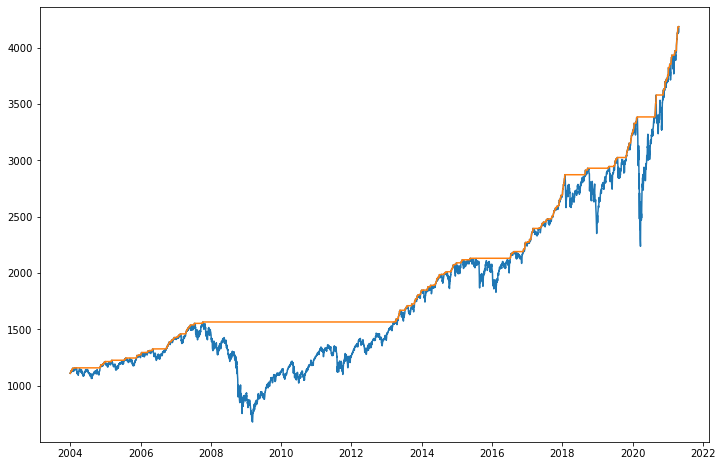

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(sp500_p['Close'])
plt.plot(sp500_p_cummax);

## Momentum and Reversal effect detection

#### Method 1

In [14]:
threshold_bear = .15
threshold_bull = .2

In [15]:
t0 = 0
period_max = sp500_p['Close'].iloc[t0]
period_min = sp500_p['Close'].iloc[t0]
bull = []
bear = []
indicator = True
for i in range(sp500_p.shape[0]):
    
    cur = sp500_p['Close'].iloc[i]
    
    if indicator:
        if cur > period_max:
            period_max = cur
            t_peak = i

        if (period_max - cur)/period_max > threshold_bear:
            bull.append((t0, t_peak))
            t0 = t_peak
    #         period_max = sp500_p.iloc[t_peak]
            period_min = cur
            indicator = False
    else:
        if cur < period_min:
            period_min = cur
            t_trough = i

        if (cur - period_min)/period_min > threshold_bull:
            bear.append((t0, t_trough))
            t0 = t_trough
            period_max = cur
    #         period_min = sp500_p.iloc[t_trough]
            indicator = True


In [16]:
sp500_p['class'] = 1

for x in bear:
    sp500_p.loc[sp500_p.index[x[0]:x[1]], 'class'] = 0

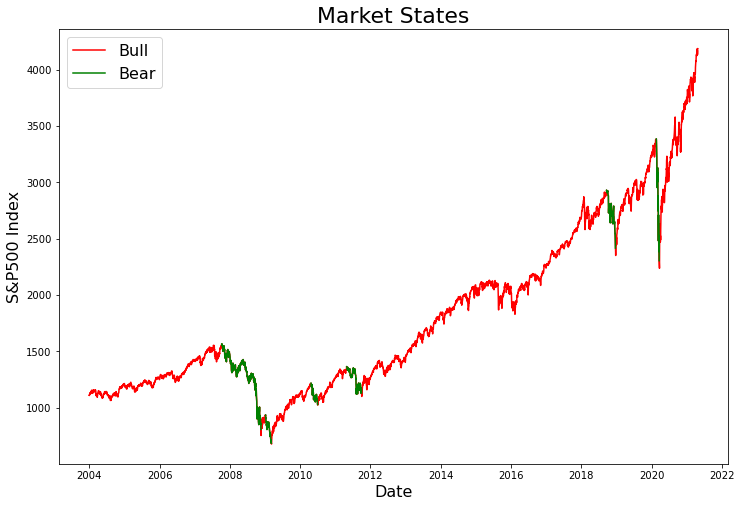

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(sp500_p['Close'], 'r')
for x in bear:
    plt.plot(sp500_p['Close'].iloc[x[0]:x[1]], 'g')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P500 Index', fontsize=16)
plt.title('Market States', fontsize=22)
plt.legend(['Bull', 'Bear'], fontsize=16)
plt.savefig('BullBear.png')

#### Method2

In [18]:
import ta

In [19]:
short_window = 25
sp500_p['SMA_{}'.format(short_window)] = ta.trend.SMAIndicator(close=sp500_p['Close'], window=short_window).sma_indicator()

In [20]:
sp500_p.dropna(inplace=True)

In [21]:
sp500_p['SMA_{}_DIFF'.format(short_window)] = sp500_p['SMA_{}'.format(short_window)].pct_change()

In [22]:
sp500_p['SMA_{}_DIFF'.format(short_window)].fillna(0, inplace=True)

In [23]:
sp500_p['class2'] = 0

for i in range(5, sp500_p.shape[0]):
    idx = sp500_p.index[i]
    
    ma_past = sp500_p['SMA_{}_DIFF'.format(short_window)][(i-4):(i+1)]
    close = sp500_p.loc[idx, 'Close']
    ma = sp500_p.loc[idx, 'SMA_{}'.format(short_window)]
    
    if close > ma and sum(ma_past >= 0) == 5:
        sp500_p.loc[idx, 'class2'] = 1
    elif close < ma and sum(ma_past >= 0) == 0:
        sp500_p.loc[idx, 'class2'] = -1
        

In [24]:
sp500_p.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,class,SMA_25,SMA_25_DIFF,class2
Date,,,,,,,,,,,
2021-04-20,4159.180176,4159.180176,4118.379883,4134.939941,4338230000,0,0,1,4032.727998,0.001649,1
2021-04-21,4128.419922,4175.020020,4126.350098,4173.419922,3865820000,0,0,1,4041.156396,0.002090,1
2021-04-22,4170.459961,4179.569824,4123.689941,4134.979980,4235040000,0,0,1,4047.590791,0.001592,1
2021-04-23,4138.779785,4194.169922,4138.779785,4180.169922,3568080000,0,0,1,4058.179189,0.002616,1
2021-04-26,4185.029785,4194.189941,4182.359863,4187.620117,3738920000,0,0,1,4069.159990,0.002706,1


In [25]:
from itertools import groupby

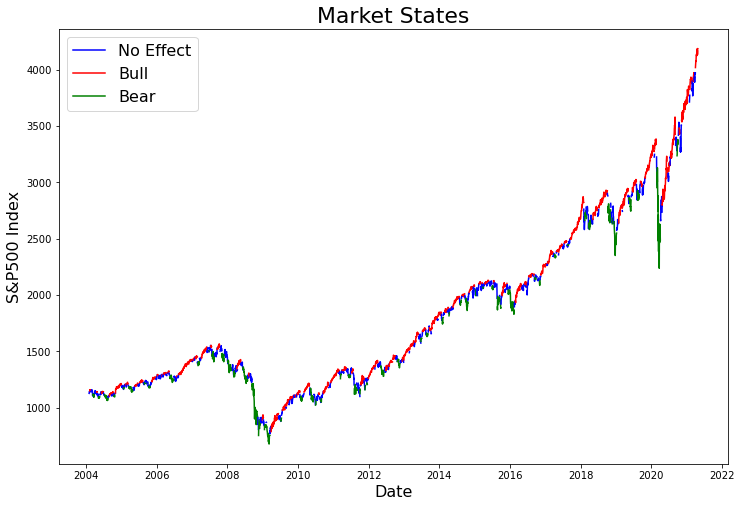

In [26]:
i = 0
c = {0: 'blue', 1: 'red', -1: 'green'}
l = []
labels = []
plt.figure(figsize=(12, 8))

for k, g in groupby(sp500_p['class2']):
    n = len(list(g))
    line, = plt.plot(sp500_p.iloc[i:i+n, 3], color=c[k])
    if k not in l:
        labels.append(line)
        l.append(k)
    i += n
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P500 Index', fontsize=16)
plt.title('Market States', fontsize=22)
plt.legend(labels, ['No Effect', 'Bull', 'Bear'], fontsize=16)
plt.savefig('BullBear_v2.png');

### Feature Engineering

In [63]:
df = sp500_p.iloc[:, :7].copy()

In [65]:
df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [66]:
short_window = 10
long_window = 20

#### Trend

In [67]:
df['SMA_{}'.format(short_window)] = ta.trend.SMAIndicator(close=df['Close'], window=short_window).sma_indicator()
df['SMA_{}'.format(long_window)] = ta.trend.SMAIndicator(close=df['Close'], window=long_window).sma_indicator()

In [68]:
df['EMA_{}'.format(short_window)] = ta.trend.EMAIndicator(close=df['Close'], window=short_window).ema_indicator()
df['EMA_{}'.format(long_window)] = ta.trend.EMAIndicator(close=df['Close'], window=long_window).ema_indicator()

In [69]:
df['MACD'] = ta.trend.MACD(close=df['Close']).macd()
df['MACD_DIFF'] = ta.trend.MACD(close=df['Close']).macd_diff()
df['MACD_SIGNAL'] = ta.trend.MACD(close=df['Close']).macd_signal()

In [70]:
df['KST'] = ta.trend.KSTIndicator(close=df['Close']).kst()
df['KST_DIFF'] = ta.trend.KSTIndicator(close=df['Close']).kst_diff()
df['KST_SIGNAL'] = ta.trend.KSTIndicator(close=df['Close']).kst_sig()

In [71]:
df['STC'] = ta.trend.STCIndicator(close=df['Close']).stc()
df['PSAR'] = ta.trend.PSARIndicator(high=df['High'], low=df['Low'], close=df['Close']).psar()
df['DPO_{}'.format(short_window)] = ta.trend.DPOIndicator(close=df['Close'], window=short_window).dpo()
df['DPO_{}'.format(long_window)] = ta.trend.DPOIndicator(close=df['Close'], window=long_window).dpo()

In [72]:
df['CCI_{}'.format(short_window)] = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = short_window).cci()
df['CCI_{}'.format(long_window)] = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = long_window).cci()

In [73]:
df['MassIndex'] = ta.trend.MassIndex(high=df['High'], low=df['Low']).mass_index()

In [74]:
df['TRIX_{}'.format(short_window)] = ta.trend.TRIXIndicator(close=df['Close'], window=short_window).trix()
df['TRIX_{}'.format(long_window)] = ta.trend.TRIXIndicator(close=df['Close'], window=long_window).trix()

In [75]:
df['VI_{}'.format(short_window)] = ta.trend.VortexIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = short_window).vortex_indicator_diff()
df['VI_{}'.format(long_window)] = ta.trend.VortexIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = long_window).vortex_indicator_diff()

In [76]:
df['ADX_{}'.format(short_window)]= ta.trend.ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = short_window).adx()
df['ADX_{}'.format(long_window)]= ta.trend.ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = long_window).adx()

D:\softwares\anaconda\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
D:\softwares\anaconda\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])
D:\softwares\anaconda\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
D:\softwares\anaconda\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


#### Volume

In [77]:
df['MFI_{}'.format(short_window)] = ta.volume.MFIIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window = short_window).money_flow_index()
df['MFI_{}'.format(long_window)] = ta.volume.MFIIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window = long_window).money_flow_index()

In [78]:
df['ADI'] = ta.volume.AccDistIndexIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume']).acc_dist_index()

In [79]:
df['OBV'] = ta.volume.OnBalanceVolumeIndicator(close=df['Close'], volume=df['Volume']).on_balance_volume()

In [80]:
df['CMF_{}'.format(short_window)] = ta.volume.ChaikinMoneyFlowIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=short_window).chaikin_money_flow()
df['CMF_{}'.format(long_window)] = ta.volume.ChaikinMoneyFlowIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=long_window).chaikin_money_flow()

In [81]:
df['FI_{}'.format(short_window)] = ta.volume.ForceIndexIndicator(close=df['Close'], volume=df['Volume'], window=short_window).force_index()
df['FI_{}'.format(long_window)] = ta.volume.ForceIndexIndicator(close=df['Close'], volume=df['Volume'], window=long_window).force_index()

In [82]:
df['EMV'] = ta.volume.EaseOfMovementIndicator(high=df['High'], low=df['Low'], volume=df['Volume'], window=short_window).ease_of_movement()
df['EMV_SMA'] = ta.volume.EaseOfMovementIndicator(high=df['High'], low=df['Low'], volume=df['Volume'], window=short_window).sma_ease_of_movement()

In [83]:
df['VPT'] = ta.volume.VolumePriceTrendIndicator(close=df['Close'], volume=df['Volume']).volume_price_trend()
df['NVI'] = ta.volume.NegativeVolumeIndexIndicator(close=df['Close'], volume=df['Volume']).negative_volume_index()

In [84]:
df['VWAP_{}'.format(short_window)] = ta.volume.VolumeWeightedAveragePrice(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=short_window).volume_weighted_average_price()
df['VWAP_{}'.format(long_window)] = ta.volume.VolumeWeightedAveragePrice(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=long_window).volume_weighted_average_price()

#### Volatility

In [85]:
df['ATR_{}'.format(short_window)] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=short_window).average_true_range()
df['ATR_{}'.format(long_window)] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=long_window).average_true_range()

In [86]:
df['BB_HIGH'] = ta.volatility.BollingerBands(close=df['Close']).bollinger_hband()
df['BB_LOW'] = ta.volatility.BollingerBands(close=df['Close']).bollinger_lband()
df['BB_EMA'] = ta.volatility.BollingerBands(close=df['Close']).bollinger_mavg()

In [87]:
df['KC_HIGH'] = ta.volatility.KeltnerChannel(high=df['High'], low=df['Low'], close=df['Close']).keltner_channel_hband()
df['KC_LOW'] = ta.volatility.KeltnerChannel(high=df['High'], low=df['Low'], close=df['Close']).keltner_channel_lband()
df['KC_EMA'] = ta.volatility.KeltnerChannel(high=df['High'], low=df['Low'], close=df['Close']).keltner_channel_mband()

In [88]:
df['DC_HIGH'] = ta.volatility.DonchianChannel(high=df['High'], low=df['Low'], close=df['Close']).donchian_channel_hband()
df['DC_LOW'] = ta.volatility.DonchianChannel(high=df['High'], low=df['Low'], close=df['Close']).donchian_channel_hband()
df['DC_EMA'] = ta.volatility.DonchianChannel(high=df['High'], low=df['Low'], close=df['Close']).donchian_channel_hband()

In [89]:
df['UI_{}'.format(short_window)] = ta.volatility.UlcerIndex(close=df['Close'], window=short_window).ulcer_index()
df['UI_{}'.format(long_window)] = ta.volatility.UlcerIndex(close=df['Close'], window=long_window).ulcer_index()

#### Momentum

In [90]:
df['RSI_{}'.format(short_window)] = ta.momentum.RSIIndicator(close=df['Close'], window=short_window).rsi()
df['RSI_{}'.format(long_window)] = ta.momentum.RSIIndicator(close=df['Close'], window=long_window).rsi()

In [91]:
df['SRSI'] = ta.momentum.StochRSIIndicator(close=df['Close']).stochrsi()

In [92]:
df['TSI'] = ta.momentum.TSIIndicator(close=df['Close']).tsi()

In [93]:
df['UO'] = ta.momentum.UltimateOscillator(high=df['High'], low=df['Low'], close=df['Close'], window1=5, window2=10, window3=20).ultimate_oscillator()

In [94]:
df['SR'] = ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'], window=short_window).stoch()

In [95]:
df['WR'] = ta.momentum.WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close']).williams_r()

In [96]:
df['AO'] = ta.momentum.AwesomeOscillatorIndicator(high=df['High'], low=df['Low']).awesome_oscillator()

In [97]:
df['KAMA'] = ta.momentum.KAMAIndicator(close=df['Close']).kama()

In [98]:
df['ROC_{}'.format(short_window)] = ta.momentum.ROCIndicator(close=df['Close'], window=short_window).roc()
df['ROC_{}'.format(long_window)] = ta.momentum.ROCIndicator(close=df['Close'], window=long_window).roc()

In [99]:
df['PPO'] = ta.momentum.PercentagePriceOscillator(close=df['Close']).ppo()

In [100]:
df['PVO'] = ta.momentum.PercentageVolumeOscillator(volume=df['Volume']).pvo()

In [101]:
df.dropna(inplace=True)

In [102]:
# df.drop(columns=['class'], inplace=True)
df = pd.concat([df.iloc[:, 0:5], df.iloc[:, 9:]], axis=1)

In [103]:
df.to_csv('features.csv')
df.tail()

,Open,High,Low,Close,Volume,MACD,MACD_DIFF,MACD_SIGNAL,KST,KST_DIFF,...,TSI,UO,SR,WR,AO,KAMA,ROC_10,ROC_20,PPO,PVO
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-05,4177.060059,4187.720215,4160.939941,4167.589844,4029050000,45.229450,-8.663370,53.892820,47.848652,-6.933166,...,27.305544,49.145020,46.166763,-50.986047,100.995152,4155.696242,-0.139695,2.148063,1.096795,-2.606826
2021-05-06,4169.140137,4202.700195,4147.330078,4201.620117,4504860000,44.480305,-7.530012,52.010317,45.813852,-7.587949,...,27.039534,56.426796,80.973856,-17.091319,89.534048,4159.128482,1.611619,2.549325,1.077123,-1.580587
2021-05-07,4210.339844,4238.040039,4201.640137,4232.600098,4013060000,45.857808,-4.922007,50.779815,43.172806,-8.568303,...,27.875358,62.998653,95.029756,-4.546159,87.048074,4163.430192,1.254259,2.514055,1.108431,-1.708767
2021-05-10,4228.290039,4236.390137,4188.129883,4188.430176,3678970000,42.890926,-6.311112,49.202037,40.648849,-9.190889,...,25.931586,54.278206,54.673573,-43.384190,81.595583,4163.541711,0.019344,1.464149,1.035768,-2.443470
2021-05-11,4150.339844,4162.040039,4111.529785,4152.100098,3593110000,37.179534,-9.618003,46.797537,37.460840,-10.153447,...,22.336227,53.514850,32.068794,-67.931206,71.970903,4163.291493,-0.826903,0.253773,0.897666,-3.175649


In [4]:
df = pd.read_csv('features.csv', index_col=0)
df.tail()

,Open,High,Low,Close,Volume,MACD,MACD_DIFF,MACD_SIGNAL,KST,KST_DIFF,...,TSI,UO,SR,WR,AO,KAMA,ROC_10,ROC_20,PPO,PVO
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-05,4177.060059,4187.720215,4160.939941,4167.589844,4029050000,45.229450,-8.663370,53.892820,47.848652,-6.933166,...,27.305544,49.145020,46.166763,-50.986047,100.995152,4155.696242,-0.139695,2.148063,1.096795,-2.606826
2021-05-06,4169.140137,4202.700195,4147.330078,4201.620117,4504860000,44.480305,-7.530012,52.010317,45.813852,-7.587949,...,27.039534,56.426796,80.973856,-17.091319,89.534048,4159.128482,1.611619,2.549325,1.077123,-1.580587
2021-05-07,4210.339844,4238.040039,4201.640137,4232.600098,4013060000,45.857808,-4.922007,50.779815,43.172806,-8.568303,...,27.875358,62.998653,95.029756,-4.546159,87.048074,4163.430192,1.254259,2.514055,1.108431,-1.708767
2021-05-10,4228.290039,4236.390137,4188.129883,4188.430176,3678970000,42.890926,-6.311112,49.202037,40.648849,-9.190889,...,25.931586,54.278206,54.673573,-43.384190,81.595583,4163.541711,0.019344,1.464149,1.035768,-2.443470
2021-05-11,4150.339844,4162.040039,4111.529785,4152.100098,3593110000,37.179534,-9.618003,46.797537,37.460840,-10.153447,...,22.336227,53.514850,32.068794,-67.931206,71.970903,4163.291493,-0.826903,0.253773,0.897666,-3.175649


In [23]:
df.shape

(4276, 64)

In [21]:
import seaborn as sns

In [107]:
corr = df.iloc[:, 6:].corr()

In [108]:
corr.shape

(58, 58)

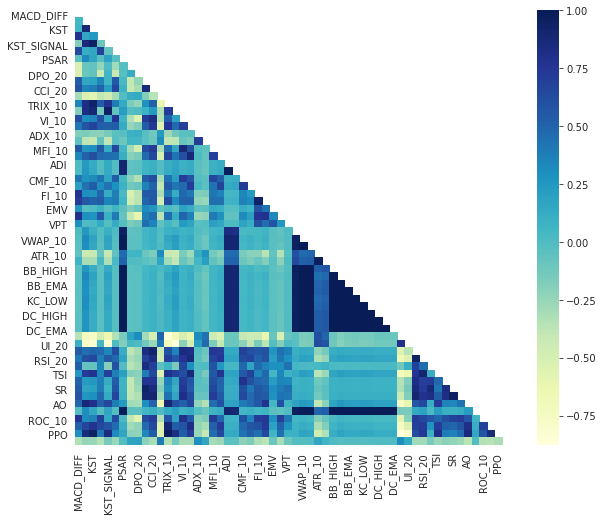

In [109]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap="YlGnBu")

    plt.savefig('Correlation.png')

## Feature Selection

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


start = '2005-01-01'
end = '2020-12-31'
X = df[start:end].dropna()
features = X.columns

In [6]:
from scipy.stats import mode
K = 15

In [7]:
def weighted(arr, threhold_bull, threhold_bear):
    value = arr.mean()
    if value > threhold_bull:
        return 1
    elif value < threhold_bear:
        return -1
    else:
        return 0

In [8]:
def knockout(arr, K):
    n = np.ceil(K/10)
    if sum(arr==-1) > n:
        return -1
    elif sum(arr==0) > n:
        return 0
    else:
        return 1

In [27]:
# y = sp500_p.loc[:, 'class2'].rolling(window=K).apply(lambda x: mode(x)[0]).shift(-K)
# y = sp500_p.loc[:, 'class2'].rolling(window=K).apply(lambda x: weighted(x, 0.7, -0.5)).shift(-K)
y = sp500_p.loc[:, 'class2'].rolling(window=K).apply(lambda x: knockout(x, K)).shift(-K)
y = y[start:end]

In [28]:
y.dropna(inplace=True)

In [29]:
# classes = sp500_p.loc[:, 'class2'].rolling(window=K).apply(lambda x: weighted(x, 0.8, -0.8))
classes = sp500_p.loc[:, 'class2'].rolling(window=K).apply(lambda x: knockout(x, K)).shift(-K)

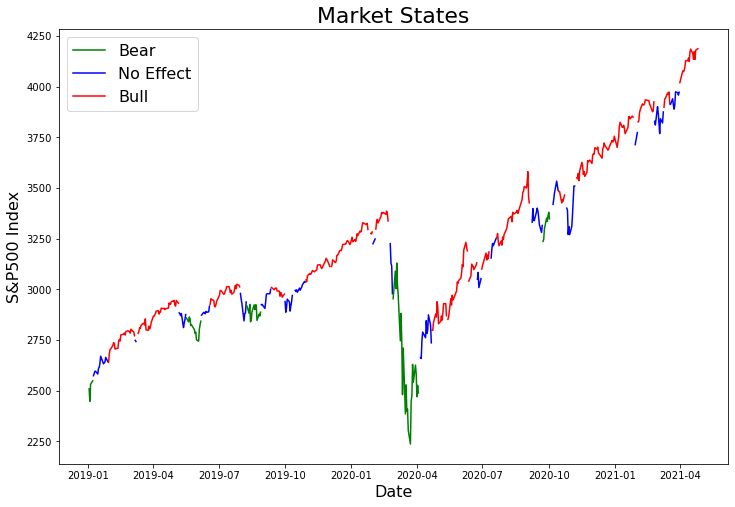

In [30]:
i = 0
c = {0: 'blue', 1: 'red', -1: 'green'}
l = []
labels = []
plt.figure(figsize=(12, 8))
df = sp500_p.loc['2019':'2021'].copy()
for k, g in groupby(sp500_p.loc['2019':'2021', 'class2']):
    n = len(list(g))
    line, = plt.plot(df.iloc[i:i+n, 3], color=c[k])
    if k not in l:
        labels.append(line)
        l.append(k)
    i += n
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P500 Index', fontsize=16)
plt.title('Market States', fontsize=22)
plt.legend(labels, ['Bear', 'No Effect', 'Bull'], fontsize=16)

In [32]:
X_train = X['2005':'2015-12-31']
X_test = X['2016-01-01':'2016-05-01']
y_train = y['2005':'2015-12-31']
y_test = y['2016-01-01':'2016-05-01']

In [31]:
from sklearn.svm import SVC

In [33]:
svm_model = SVC(probability=True)

In [34]:
svm_model = svm_model.fit(X_train, y_train)

In [35]:
from sklearn import metrics

predicted = pd.DataFrame(svm_model.predict(X_test))
probs = pd.DataFrame(svm_model.predict_proba(X_test))
labs = ['Bear', 'No Effect', 'Bull']
# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
# svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted, target_names=labs, zero_division=0)

In [36]:
svm_accuracy

0.3780487804878049

In [37]:
print(svm_confus_matrix)

[[12 14  0]
 [ 1 19  0]
 [ 0 36  0]]


In [38]:
print(svm_classification_report)

              precision    recall  f1-score   support

        Bear       0.92      0.46      0.62        26
   No Effect       0.28      0.95      0.43        20
        Bull       0.00      0.00      0.00        36

    accuracy                           0.38        82
   macro avg       0.40      0.47      0.35        82
weighted avg       0.36      0.38      0.30        82



### Filter method

In [41]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=20)
# apply feature selection
X_train_selected = fs.fit_transform(X_train, y_train)
X_test_selected = fs.transform(X_test)

In [42]:
svm_model_filter = SVC(probability=True)
svm_model_filter = svm_model_filter.fit(X_train_selected, y_train)

In [43]:
predicted = pd.DataFrame(svm_model_filter.predict(X_test_selected))
probs = pd.DataFrame(svm_model_filter.predict_proba(X_test_selected))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
# svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted, target_names=labs)

In [44]:
svm_accuracy

0.6707317073170732

In [45]:
print(svm_confus_matrix)

[[23  3  0]
 [ 4  2 14]
 [ 0  6 30]]


In [132]:
print(svm_classification_report)

              precision    recall  f1-score   support

        Bear       0.85      0.88      0.87        26
   No Effect       0.18      0.10      0.13        20
        Bull       0.68      0.83      0.75        36

    accuracy                           0.67        82
   macro avg       0.57      0.61      0.58        82
weighted avg       0.61      0.67      0.64        82



### Wrapper method

In [133]:
from boruta import BorutaPy

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rf = RandomForestClassifier(n_jobs=-1, max_depth=5)

In [136]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1)

In [137]:
importances = pd.DataFrame({'Features': features.values, 'Importance': rf.feature_importances_})

In [138]:
predicted = pd.DataFrame(rf.predict(X_test))
probs = pd.DataFrame(rf.predict_proba(X_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted, target_names=labs)

In [139]:
rf_confus_matrix

array([[26,  0,  0],
       [ 4, 16,  0],
       [ 0, 17, 19]], dtype=int64)

In [140]:
rf_accuracy

0.7439024390243902

In [141]:
print(rf_classification_report)

              precision    recall  f1-score   support

        Bear       0.87      1.00      0.93        26
   No Effect       0.48      0.80      0.60        20
        Bull       1.00      0.53      0.69        36

    accuracy                           0.74        82
   macro avg       0.78      0.78      0.74        82
weighted avg       0.83      0.74      0.75        82



#### Forward Feature Selection

In [142]:
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, max_iter = 50)
boruta_feature_selector.fit(X_train.values, y_train.values)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	62
Tentative: 	2
Rejected: 	0
Iteration: 	9 / 50
Confirmed: 	62
Tentative: 	2
Rejected: 	0
Iteration: 	10 / 50
Confirmed: 	62
Tentative: 	2
Rejected: 	0
Iteration: 	11 / 50
Confirmed: 	62
Tentative: 	2
Rejected: 	0
Iteration: 	12 / 50
Confirmed: 	62
Tentative: 	2
Rejected: 	0
Iteration: 	13 / 50
Confirmed: 	62
Tentative: 	2
Rejected: 	0
Iteration: 	14 / 50
Confirmed: 	62
Tentative: 	2
Rejected: 	0
Iteration: 	15 / 50
Confirmed: 	62
Tentative: 	2
Rejected: 	0
Iteration: 	16 / 50
Confirmed: 	62
Tentative: 	2
Rejected: 	0
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=226,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1E46DB0D840),
         max_iter=50, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1E46DB0D840, verbose=2)

In [143]:
X_train_wrapper = boruta_feature_selector.transform(X_train.values)
X_test_wrapper = boruta_feature_selector.transform(X_test.values)

In [144]:
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)

['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'MACD_DIFF', 'MACD_SIGNAL', 'KST', 'KST_DIFF', 'KST_SIGNAL', 'STC', 'PSAR', 'DPO_10', 'DPO_20', 'CCI_10', 'CCI_20', 'MassIndex', 'TRIX_10', 'TRIX_20', 'VI_10', 'VI_20', 'ADX_10', 'ADX_20', 'MFI_10', 'MFI_20', 'ADI', 'OBV', 'CMF_10', 'CMF_20', 'FI_10', 'FI_20', 'EMV', 'EMV_SMA', 'VPT', 'NVI', 'VWAP_10', 'VWAP_20', 'ATR_10', 'ATR_20', 'BB_HIGH', 'BB_LOW', 'BB_EMA', 'KC_HIGH', 'KC_LOW', 'KC_EMA', 'DC_HIGH', 'DC_LOW', 'DC_EMA', 'UI_10', 'UI_20', 'RSI_10', 'RSI_20', 'SRSI', 'TSI', 'UO', 'SR', 'WR', 'AO', 'KAMA', 'ROC_10', 'ROC_20', 'PPO', 'PVO']


In [145]:
len(final_features)

64

In [146]:
X_test_wrapper.shape

(82, 64)

In [147]:
rf_wrapper = RandomForestClassifier(n_jobs=-1, max_depth=5)
rf_wrapper.fit(X_train_wrapper, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1)

In [148]:
predicted = pd.DataFrame(rf_wrapper.predict(X_test_wrapper))
probs = pd.DataFrame(rf_wrapper.predict_proba(X_test_wrapper))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted, target_names=labs)

In [149]:
rf_accuracy

0.7195121951219512

In [150]:
print(rf_classification_report)

              precision    recall  f1-score   support

        Bear       0.87      1.00      0.93        26
   No Effect       0.46      0.80      0.58        20
        Bull       1.00      0.47      0.64        36

    accuracy                           0.72        82
   macro avg       0.77      0.76      0.72        82
weighted avg       0.83      0.72      0.72        82



### Embedded Methods

In [151]:
importances.sort_values('Importance', ascending=False, inplace=True)

In [152]:
importances['CumImportance'] = importances['Importance'].cumsum()

In [153]:
top = importances.loc[importances['CumImportance'] <= .952]

In [154]:
features[top.index]

Index(['RSI_20', 'RSI_10', 'ROC_20', 'AO', 'CCI_20', 'VI_20', 'TRIX_10',
       'FI_20', 'MACD', 'PPO', 'EMV_SMA', 'TSI', 'MACD_DIFF', 'KST_DIFF', 'WR',
       'KST', 'ROC_10', 'VI_10', 'FI_10', 'UI_10', 'MACD_SIGNAL', 'UO',
       'UI_20', 'STC', 'KST_SIGNAL', 'CCI_10', 'MFI_20', 'MassIndex',
       'TRIX_20', 'KAMA', 'MFI_10', 'CMF_10', 'PSAR', 'SR', 'BB_LOW', 'NVI',
       'KC_EMA', 'KC_HIGH', 'ADX_20', 'VWAP_10', 'ADI', 'OBV', 'VWAP_20',
       'DC_LOW', 'DC_EMA', 'CMF_20', 'BB_EMA', 'ADX_10'],
      dtype='object')

In [155]:
top.shape

(48, 3)

In [156]:
X_train_em = X_train.loc[:, features[top.index]]
X_test_em = X_test.loc[:, features[top.index]]

In [157]:
rf_em = RandomForestClassifier(n_jobs=-1, max_depth=5)
rf_em.fit(X_train_em, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1)

In [158]:
predicted = pd.DataFrame(rf_em.predict(X_test_em))
probs = pd.DataFrame(rf_em.predict_proba(X_test_em))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted, target_names=labs)

In [160]:
rf_accuracy

0.7195121951219512

In [161]:
print(rf_classification_report)

              precision    recall  f1-score   support

        Bear       0.87      1.00      0.93        26
   No Effect       0.46      0.80      0.58        20
        Bull       1.00      0.47      0.64        36

    accuracy                           0.72        82
   macro avg       0.77      0.76      0.72        82
weighted avg       0.83      0.72      0.72        82



In [162]:
svm_model_em = SVC(probability=True)
svm_model_em = svm_model_filter.fit(X_train_em, y_train)

In [163]:
predicted = pd.DataFrame(svm_model_em.predict(X_test_em))
probs = pd.DataFrame(svm_model_em.predict_proba(X_test_em))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted, target_names=labs, zero_division=0)

In [164]:
svm_accuracy

0.36585365853658536

In [165]:
print(svm_classification_report)

              precision    recall  f1-score   support

        Bear       0.92      0.42      0.58        26
   No Effect       0.27      0.95      0.42        20
        Bull       0.00      0.00      0.00        36

    accuracy                           0.37        82
   macro avg       0.40      0.46      0.33        82
weighted avg       0.36      0.37      0.29        82



#### Test other models

**LightGBM**

In [60]:
import lightgbm as lgb

# Create LightGBM classifer object based on Decisiontree
lgb_clf = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3)

# Train LightGBM Classifer
lgb_clf.fit(X_train, y_train);

In [48]:
predicted = pd.DataFrame(lgb_clf.predict(X_test))
probs = pd.DataFrame(lgb_clf.predict_proba(X_test))

# Store metrics
accuracy = metrics.accuracy_score(y_test, predicted)
confus_matrix = metrics.confusion_matrix(y_test, predicted)
classification_report = metrics.classification_report(y_test, predicted, target_names=labs)

In [49]:
accuracy

0.6585365853658537

In [50]:
confus_matrix

array([[26,  0,  0],
       [ 4, 16,  0],
       [ 1, 23, 12]], dtype=int64)

In [51]:
print(classification_report)

              precision    recall  f1-score   support

        Bear       0.84      1.00      0.91        26
   No Effect       0.41      0.80      0.54        20
        Bull       1.00      0.33      0.50        36

    accuracy                           0.66        82
   macro avg       0.75      0.71      0.65        82
weighted avg       0.81      0.66      0.64        82



**MLP**

In [59]:
from sklearn.neural_network import MLPClassifier

In [64]:
mlp_clf = MLPClassifier(activation='logistic', solver='adam', alpha=1e-4,
                        hidden_layer_sizes=(64, 128, 64, 32), random_state=1)

mlp_clf.fit(X_train, y_train);

In [65]:
predicted = pd.DataFrame(mlp_clf.predict(X_test))
probs = pd.DataFrame(mlp_clf.predict_proba(X_test))

# Store metrics
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted, average='weighted', zero_division=0)
confus_matrix = metrics.confusion_matrix(y_test, predicted)
classification_report = metrics.classification_report(y_test, predicted, target_names=labs, zero_division=0)

In [66]:
accuracy, precision

(0.6341463414634146, 0.7888437217705511)

In [67]:
confus_matrix

array([[22,  4,  0],
       [ 5, 15,  0],
       [ 0, 21, 15]], dtype=int64)

In [417]:
print(classification_report)

              precision    recall  f1-score   support

        Bear       0.83      0.92      0.87        26
   No Effect       0.20      0.10      0.13        20
        Bull       0.70      0.83      0.76        36

    accuracy                           0.68        82
   macro avg       0.58      0.62      0.59        82
weighted avg       0.62      0.68      0.64        82



**Decision Tree**

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [44]:
predicted = pd.DataFrame(dt_clf.predict(X_test))
probs = pd.DataFrame(dt_clf.predict_proba(X_test))

# Store metrics
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted, average='weighted', zero_division=0)
confus_matrix = metrics.confusion_matrix(y_test, predicted)
classification_report = metrics.classification_report(y_test, predicted, target_names=labs, zero_division=0)

In [45]:
accuracy, precision

(0.8048780487804879, 0.8314895085290376)

In [115]:
print(confus_matrix)

[[26  0  0]
 [12  8  0]
 [ 1 11 24]]


In [111]:
print(classification_report)

              precision    recall  f1-score   support

        Bear       0.90      1.00      0.95        26
   No Effect       0.52      0.75      0.61        20
        Bull       0.92      0.61      0.73        36

    accuracy                           0.77        82
   macro avg       0.78      0.79      0.76        82
weighted avg       0.81      0.77      0.77        82



**LSTM**

In [95]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [98]:
X_train.shape

(2769, 64)

In [99]:
model = Sequential()
model.add(LSTM(256, input_shape=X_train.shape))
model.add(Dense(1, activation='sigmoid'))

In [100]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


In [101]:
X_train_new, X_val = X_train[:252*9], X_train[252*9:]
y_train_new, y_val = y_train[:252*9], y_train[252*9:]

In [102]:
model.fit(X_train_new, y_train_new, epochs=50, batch_size=128, callbacks=[chk], validation_data=(X_val, y_val))

Epoch 1/50


ValueError: in user code:

    D:\softwares\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    D:\softwares\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\softwares\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\softwares\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\softwares\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\softwares\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    D:\softwares\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    D:\softwares\anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    D:\softwares\anaconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)


### PCA

In [171]:
from sklearn.decomposition import PCA

In [172]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X_train)

In [173]:
principalComponents.shape

(2769, 30)

In [174]:
principalComponents_test = pca.transform(X_test)

In [175]:
svm_model_pca = SVC(probability=True)
svm_model_pca = svm_model_pca.fit(principalComponents, y_train)

In [176]:
predicted = pd.DataFrame(svm_model_pca.predict(principalComponents_test))
probs = pd.DataFrame(svm_model_pca.predict_proba(principalComponents_test))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
# svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted, target_names=labs, zero_division=0)

In [177]:
svm_accuracy

0.45121951219512196

In [178]:
print(svm_classification_report)

              precision    recall  f1-score   support

        Bear       0.87      0.77      0.82        26
   No Effect       0.29      0.85      0.43        20
        Bull       0.00      0.00      0.00        36

    accuracy                           0.45        82
   macro avg       0.39      0.54      0.42        82
weighted avg       0.35      0.45      0.36        82



#### Search for the best number of features based on filter method

In [86]:
accuracies = []
precisions = []
for k in range(10, 50, 2):
    fs = SelectKBest(score_func=f_classif, k=k)
    # apply feature selection
    X_train_selected = fs.fit_transform(X_train, y_train)
    X_test_selected = fs.transform(X_test)
    
    svm_model = SVC(probability=True)
    svm_model = svm_model.fit(X_train_selected, y_train)
    predicted = pd.DataFrame(svm_model.predict(X_test_selected))

    # Store metrics
    svm_accuracy = metrics.accuracy_score(y_test, predicted)
    svm_precision = metrics.precision_score(y_test, predicted, average='weighted', zero_division=0)
    
    accuracies.append(svm_accuracy)
    precisions.append(svm_precision)

In [87]:
measures = pd.DataFrame({'NumpfFeatures': np.arange(10, 50, 2), 'Accuracy': accuracies, 'Precision': precisions})

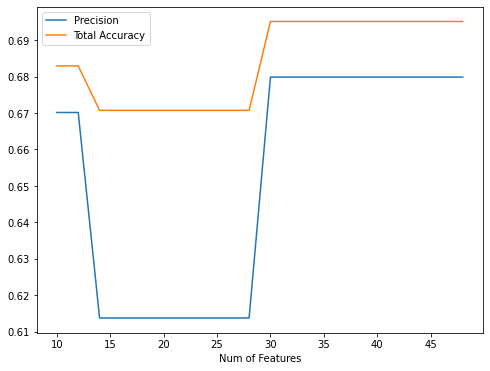

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(measures['NumpfFeatures'], measures['Precision'], label='Precision')
plt.plot(measures['NumpfFeatures'], measures['Accuracy'], label='Total Accuracy')
plt.xlabel('Num of Features')
# plt.ylabel('Precision')
plt.legend()
plt.savefig('NumSelect.png')

from the above results, the precision and total score is highest when number of features is above 30. Because of the dimension curse, here the smallest number is selected, which is 30

In [38]:
fs = SelectKBest(score_func=f_classif, k=30)
# apply feature selection
X_train_selected = fs.fit_transform(X_train, y_train)
X_test_selected = fs.transform(X_test)

svm_model = SVC(probability=True)
svm_model = svm_model.fit(X_train_selected, y_train)
predicted = pd.DataFrame(svm_model.predict(X_test_selected))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
svm_precision = metrics.precision_score(y_test, predicted, average='weighted')
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)

In [39]:
svm_precision

0.6798644147432186

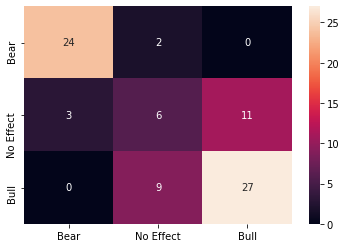

In [41]:
cm = pd.DataFrame(svm_confus_matrix, columns=labs, index=labs)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True)
plt.savefig('cm_plain.png')

### Standardization

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

# Fit on training set only.
scaler.fit(X_train_selected)
# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [41]:
svm_model_scale = SVC(probability=True)
svm_model_scale = svm_model_scale.fit(X_train_scaled, y_train)

In [42]:
predicted = pd.DataFrame(svm_model_scale.predict(X_test_scaled))
probs = pd.DataFrame(svm_model_scale.predict_proba(X_test_scaled))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
svm_precision = metrics.precision_score(y_test, predicted, average='weighted')
# svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted, target_names=labs, zero_division=0)

In [43]:
svm_precision

0.8124258696167863

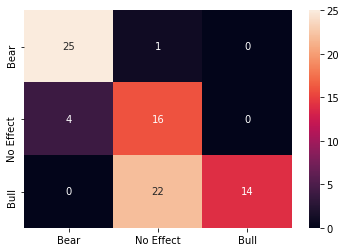

In [54]:
cm = pd.DataFrame(svm_confus_matrix, columns=labs, index=labs)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True);
plt.savefig('cm_scaled.png')

#### Search best hyperparameters for SVM

In [41]:
from sklearn.model_selection import GridSearchCV

In [196]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': ['scale', 'auto'],
                     'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='precision_macro', cv=3)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'kernel': ['linear']}],
             scoring='precision_macro')

In [197]:
clf.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Later on, for SVM, the best parameters will be used to build the model.


#### Search best hyperparameters for Decision Tree

In [57]:
tuned_parameters = {'max_depth': [3, 5, 10]}
clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='precision_macro', cv=3)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10]}, scoring='precision_macro')

In [58]:
clf.best_params_

{'max_depth': 3}

#### Search best hyperparameters for Random Forest

In [60]:
tuned_parameters = {'max_depth': [3, 5, 10]}
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='precision_macro', cv=3)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10]}, scoring='precision_macro')

In [61]:
clf.best_params_

{'max_depth': 3}

### Trading Strategy

In [53]:
returns = price_table.pct_change().fillna(0)
returns = returns[start:]
returns

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,0.004021,0.000429,0.000000,-0.027850,-0.023333,-0.027255,-0.016736,-0.027702,-0.002976,-0.008778,...,0.004858,-0.020472,-0.009890,-0.013482,0.000000,-0.007631,-0.013682,-0.009235,-0.009408,0.000000
2005-01-04,-0.008131,-0.010071,0.000000,-0.001999,-0.023512,-0.025981,-0.026422,-0.056049,-0.006659,-0.036900,...,0.007009,-0.002136,-0.014983,-0.028357,0.000000,-0.013242,-0.018735,-0.000379,-0.013652,0.000000
2005-01-05,-0.012236,-0.011472,0.000000,-0.019359,-0.003884,0.014644,-0.005495,-0.022761,0.001849,-0.002299,...,-0.015842,0.011313,-0.011268,-0.031646,0.000000,-0.002381,-0.034882,-0.007813,-0.003611,0.000000
2005-01-06,0.009043,0.022553,0.000000,-0.011572,-0.008967,-0.013918,-0.016575,-0.001519,-0.000923,0.000768,...,-0.004146,0.040514,-0.001709,-0.015977,0.000000,0.011282,0.001522,0.011558,0.005738,0.000000
2005-01-07,0.010312,0.017131,0.000000,-0.015840,0.046813,-0.033455,0.000681,0.010142,-0.005774,-0.014582,...,-0.012736,-0.033270,-0.005708,0.008487,0.000000,-0.005578,0.008547,-0.001758,-0.024321,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,0.013011,0.021667,0.016234,0.037989,0.007346,-0.013655,-0.003637,0.029519,0.030736,0.004956,...,-0.006281,0.035761,-0.003215,0.026937,0.017567,-0.004324,-0.016394,0.016340,0.024833,0.008356
2021-04-22,0.000100,0.007341,-0.006769,0.002218,-0.001926,0.005581,-0.009857,-0.031246,0.002151,-0.002466,...,-0.010987,-0.012779,-0.002804,-0.030484,-0.003654,0.003150,-0.008181,0.004133,-0.020317,-0.006347
2021-04-23,0.006471,-0.001538,0.012085,0.022219,0.005445,-0.007257,0.016854,0.046800,-0.002746,-0.000706,...,-0.001115,-0.001849,-0.000562,0.053461,0.012835,-0.000849,0.020642,0.001353,0.032534,0.008695


In [55]:
sp500_p.loc[:, 'class2'].rolling(window=K).apply(lambda x: knockout(x, K)).shift(-K)[start:end]

Date
2005-01-03    0.0
2005-01-04    0.0
2005-01-05   -1.0
2005-01-06   -1.0
2005-01-07   -1.0
             ... 
2020-12-24    1.0
2020-12-28    1.0
2020-12-29    1.0
2020-12-30    1.0
2020-12-31    1.0
Name: class2, Length: 4028, dtype: float64

In [45]:
J = 60
K = 15

use 10 year data as training set

In [46]:
window = 252*10

In [47]:
threhold = .5

In [48]:
def ageWeighted(values, lmb):
    n = len(values)
    weighted = 0
    values = values[::-1]
    for i, v in enumerate(values):
        w = (1-lmb) * lmb**i / (1-lmb**n)
        weighted += w*v
        
    return weighted

In [49]:
lmb = .96

In [50]:
start = '2005-01-01'
end = '2020-12-31'

In [96]:
sp_rets = sp500_p['Close'].pct_change()
benchmark = sp_rets[start:]

In [109]:
def backtest(model, K, J, threhold):
    print('Model: '+ str(model))
    portfolio = pd.DataFrame()
#     portfolio2 = pd.DataFrame()
    i = 0
    precisions = []
    predicts = []
    y = sp500_p.loc[:, 'class2'].rolling(window=K).apply(lambda x: knockout(x, K)).shift(-K)
    y = y[start:end]
    sp_rets = sp500_p['Close'].pct_change()
    benchmark = sp_rets[start:]
    
    y.dropna(inplace=True)
    while i < len(y) - window:

        obsStart = i+window-J
        obsEnd = i+window

        X_train = X.iloc[i:obsStart]
        y_train = y.iloc[i:obsStart]

        X_test = X.iloc[obsStart:obsEnd]
        y_test = y.iloc[obsStart:obsEnd]
        # apply feature selection
        fs = SelectKBest(score_func=f_classif, k=35)
        fs.fit(X_train, y_train)
        X_train_selected = fs.transform(X_train)
        X_test_selected = fs.transform(X_test)

        # Standardization
        scaler = StandardScaler()
        # Fit on training set only.
        scaler.fit(X_train_selected)
        # Apply transform to both the training set and the test set.
        X_train_scaled = scaler.transform(X_train_selected)
        X_test_scaled = scaler.transform(X_test_selected)

        # feed the model and make prediction
#         model = RandomForestClassifier(n_jobs=-1, max_depth=5)
#         model = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3)
#         model = SVC(probability=True)
        model.fit(X_train_scaled, y_train)
        y_predict = model.predict(X_test_scaled)
        precision = metrics.precision_score(y_test, y_predict, average='weighted', zero_division=0)
        # use age-weighted prediction
        final_predict = ageWeighted(y_predict[-K:], lmb)

        precisions.append(precision)
        predicts.append(final_predict)


        # Detect past winners and losers
        pastPerform = returns.iloc[obsStart:obsEnd]
        totRet = (pastPerform + 1).prod().sort_values()
        winners = totRet.index[-50:]
        losers = totRet.index[:50]

        futurePerform = returns.iloc[obsEnd:obsEnd+K]

        winnersPer = futurePerform.loc[:, winners].mean(axis=1)
        losersPer = futurePerform.loc[:, losers].mean(axis=1)

        if final_predict > threhold:
            partportfolio = pd.DataFrame(winnersPer - losersPer)
#             partportfolio = pd.DataFrame(winnersPer)
#             partportfolio2 = pd.DataFrame(benchmark.iloc[obsEnd:obsEnd+K].values).reindex_like(pd.DataFrame(winnersPer))
            
        elif final_predict < -threhold:
            partportfolio = pd.DataFrame(losersPer - winnersPer)
#             partportfolio = pd.DataFrame(-winnersPer)
#             partportfolio2 = pd.DataFrame(-benchmark.iloc[obsEnd:obsEnd+K].values).reindex_like(pd.DataFrame(winnersPer))
        else:
            partportfolio = pd.DataFrame().reindex_like(pd.DataFrame(winnersPer)).fillna(0)
#             partportfolio2 = pd.DataFrame().reindex_like(pd.DataFrame(winnersPer)).fillna(0)

        portfolio = pd.concat([portfolio, partportfolio])
#         portfolio2 = pd.concat([portfolio2, partportfolio2])

        i += K
    
    print('Finish Backtest')
    cumRet = (portfolio + 1).cumprod()
#     cumRet2 = (portfolio2 + 1).cumprod()
    
    return portfolio, cumRet #, portfolio2, cumRet2

In [106]:
svm = SVC(kernel='rbf', probability=True)
rf = RandomForestClassifier(n_jobs=-1, max_depth=3)
lgb_model = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3)
dt_model = DecisionTreeClassifier(max_depth=3)
mlp_model = MLPClassifier(activation='logistic', solver='adam', alpha=1e-4, hidden_layer_sizes=(64, 128, 64, 32), random_state=1)

In [107]:
models = [svm, rf, lgb_model, dt_model, mlp_model]

In [88]:
ports = []
model_rets = []
model_rets2 = []

for model in models:
    port, ret, port2, ret2 = backtest(model, K, J, threhold)
    ports.append(port)
    model_rets.append(ret)
    model_rets2.append(ret2)

Model: SVC(probability=True)
Finish Backtest
Model: RandomForestClassifier(max_depth=3, n_jobs=-1)
Finish Backtest
Model: LGBMClassifier(max_depth=3, n_estimators=1000)
Finish Backtest
Model: DecisionTreeClassifier(max_depth=3)
Finish Backtest
Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(64, 128, 64, 32),
              random_state=1)


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Finish Backtest


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [89]:
dates = model_rets[0].index.values
names = ['SVM', 'RF', 'LGB', 'DT', 'MLP']

In [90]:
dates.shape

(1515,)

In [114]:
benchmark = benchmark.loc[dates]

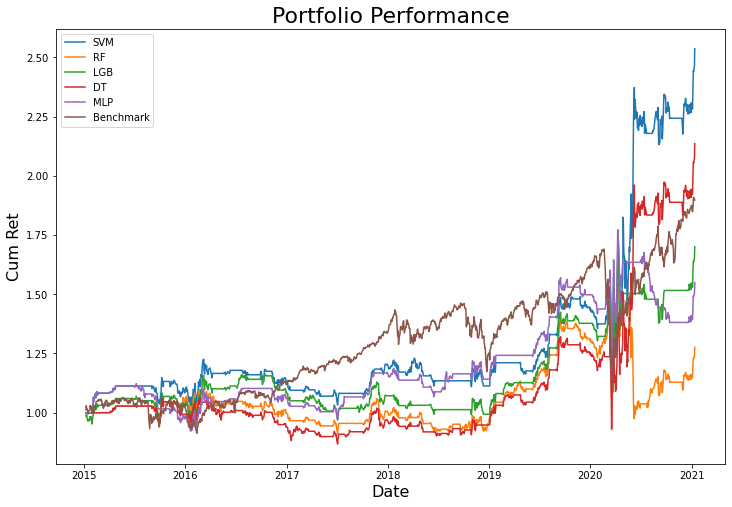

In [92]:
plt.figure(figsize=(12, 8))
for v, n in zip(model_rets, names):
    plt.plot(benchmark.index.values, v.values, label=n)
# plt.plot(svm_ret.values)
# plt.plot(rf_ret.values)
# plt.plot(lgb_ret.values)
plt.plot(benchmark.index.values, (benchmark.loc[dates]+1).cumprod().values, label='Benchmark')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cum Ret', fontsize=16)
plt.title('Portfolio Performance', fontsize=22)
plt.legend()
plt.savefig('Performance.png')

In [123]:
model_rets[0]['2020':'2021'], benchmark['2020':'2021']

(                   0
 Date                
 2020-01-02  1.221167
 2020-01-03  1.206070
 2020-01-06  1.210060
 2020-01-07  1.213443
 2020-01-08  1.216671
 ...              ...
 2020-12-24  2.058499
 2020-12-28  2.062962
 2020-12-29  2.050071
 2020-12-30  2.088055
 2020-12-31  2.070487
 
 [253 rows x 1 columns],
 Date
 2020-01-02    0.008379
 2020-01-03   -0.007060
 2020-01-06    0.003533
 2020-01-07   -0.002803
 2020-01-08    0.004902
                 ...   
 2021-01-06    0.005710
 2021-01-07    0.014847
 2021-01-08    0.005492
 2021-01-11   -0.006555
 2021-01-12    0.000416
 Name: Close, Length: 260, dtype: float64)

ValueError: x and y must have same first dimension, but have shapes (260,) and (253, 1)

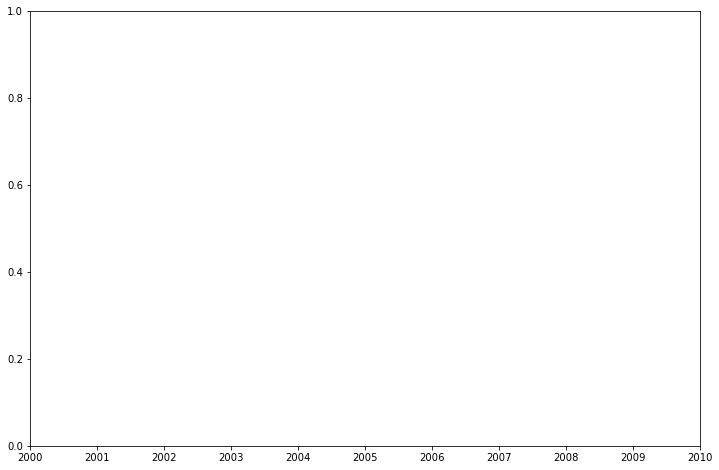

In [120]:
plt.figure(figsize=(12, 8))
for v, n in zip(model_rets, names):
    plt.plot(benchmark['2020':'2021'].index.values, v['2020':'2021'].values, label=n)
# plt.plot(svm_ret.values)
# plt.plot(rf_ret.values)
# plt.plot(lgb_ret.values)
plt.plot(benchmark['2020':'2021'].index.values, (benchmark.loc[dates]+1).cumprod()['2020':'2021'].values, label='Benchmark')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cum Ret', fontsize=16)
plt.title('Portfolio Performance', fontsize=22)
plt.legend()
plt.savefig('Performance.png')

### Evaluate Performance

In [112]:
import measures

K = 15, J = 60

In [74]:
sp = measures.summary_stats(benchmark, periods_per_year=252)
overall = [sp]

for p in ports:
    stats = measures.summary_stats(p.iloc[:, 0], periods_per_year=252)
    overall.append(stats)

In [75]:
overall = pd.concat(overall)
overall.index = ['Benchmark'] + names
overall.index.rename('J={} K={}'.format(J, K), inplace=True)

In [76]:
overall

,Cumulative Return,Net Asset Value,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
J=60 K=15,,,,,,,,,,
Benchmark,0.898118,379623.588139,0.112488,0.186402,-0.675795,22.418614,0.016370,0.029451,0.429678,-0.339250
SVM,1.536789,507357.726824,0.167474,0.216881,1.227159,24.911540,0.010568,0.029893,0.615469,-0.265636
RF,0.377067,275413.461785,0.054662,0.202639,-0.215212,25.890237,0.015572,0.031435,0.118162,-0.388197
LGB,0.700814,340162.820348,0.092362,0.179061,0.535906,34.294605,0.009233,0.025567,0.338160,-0.265636
DT,1.135627,427125.396647,0.134520,0.214258,1.232836,26.095987,0.010200,0.030314,0.473660,-0.295694
MLP,0.549291,309858.113328,0.075539,0.175115,0.632932,36.825827,0.008194,0.024805,0.252496,-0.265636


In [110]:
J = 45
K = 15
ports = []
model_rets = []
for model in models:
    port, ret = backtest(model, K, J, threhold)
    ports.append(port)
    model_rets.append(ret)

Model: SVC(probability=True)
Finish Backtest
Model: RandomForestClassifier(max_depth=3, n_jobs=-1)
Finish Backtest
Model: LGBMClassifier(max_depth=3, n_estimators=1000)
Finish Backtest
Model: DecisionTreeClassifier(max_depth=3)
Finish Backtest
Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(64, 128, 64, 32),
              random_state=1)


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Finish Backtest


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [115]:
sp = measures.summary_stats(benchmark, periods_per_year=252)
overall = [sp]

for p in ports:
    stats = measures.summary_stats(p.iloc[:, 0], periods_per_year=252)
    overall.append(stats)

overall = pd.concat(overall)
overall.index = ['Benchmark'] + names
overall.index.rename('J={} K={}'.format(J, K), inplace=True)
overall

,Cumulative Return,Net Asset Value,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
J=45 K=15,,,,,,,,,,
Benchmark,0.898118,379623.588139,0.112488,0.186402,-0.675795,22.418614,0.016370,0.029451,0.429678,-0.339250
SVM,1.286149,457229.815073,0.147446,0.216212,1.215997,28.084246,0.009781,0.029939,0.527427,-0.293415
RF,0.364712,272942.337224,0.053082,0.200780,0.265019,28.527387,0.013029,0.030522,0.111615,-0.325158
LGB,0.303351,260670.123198,0.045054,0.195813,0.322291,31.434047,0.011802,0.029828,0.074639,-0.357408
DT,0.538461,307692.128776,0.074285,0.211952,1.094243,30.327041,0.009769,0.030715,0.202863,-0.329454
MLP,0.152990,230598.062471,0.023962,0.216861,-0.254513,28.038511,0.016346,0.033579,-0.027047,-0.371654


In [83]:
J = 30
K = 15
ports = []
model_rets = []
for model in models:
    port, ret = backtest(model, K, J, threhold)
    ports.append(port)
    model_rets.append(ret)

Model: SVC(probability=True)
Finish Backtest
Model: RandomForestClassifier(max_depth=3, n_jobs=-1)
Finish Backtest
Model: LGBMClassifier(max_depth=3, n_estimators=1000)
Finish Backtest
Model: DecisionTreeClassifier(max_depth=3)
Finish Backtest
Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(64, 128, 64, 32),
              random_state=1)


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Finish Backtest


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [84]:
sp = measures.summary_stats(benchmark, periods_per_year=252)
overall = [sp]

for p in ports:
    stats = measures.summary_stats(p.iloc[:, 0], periods_per_year=252)
    overall.append(stats)

overall = pd.concat(overall)
overall.index = ['Benchmark'] + names
overall.index.rename('J={} K={}'.format(J, K), inplace=True)
overall

,Cumulative Return,Net Asset Value,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
J=30 K=15,,,,,,,,,,
Benchmark,0.898118,379623.588139,0.112488,0.186402,-0.675795,22.418614,0.016370,0.029451,0.429678,-0.339250
SVM,0.402747,280549.462418,0.057908,0.195437,0.870104,29.730157,0.010087,0.027575,0.138646,-0.287625
RF,0.124926,224985.226888,0.019774,0.195770,0.538987,29.412900,0.011597,0.029197,-0.050732,-0.316653
LGB,0.416045,283209.028697,0.059570,0.183421,0.686976,37.466439,0.008311,0.026662,0.156526,-0.287625
DT,-0.038245,192350.948639,-0.006465,0.188945,0.553120,32.946032,0.010397,0.028187,-0.187406,-0.325422
MLP,0.393529,278705.838833,0.056749,0.183237,0.785447,36.866652,0.008098,0.026404,0.141734,-0.287625


In [85]:
J = 60
K = 10
ports = []
model_rets = []
for model in models:
    port, ret = backtest(model, K, J, threhold)
    ports.append(port)
    model_rets.append(ret)

Model: SVC(probability=True)
Finish Backtest
Model: RandomForestClassifier(max_depth=3, n_jobs=-1)
Finish Backtest
Model: LGBMClassifier(max_depth=3, n_estimators=1000)
Finish Backtest
Model: DecisionTreeClassifier(max_depth=3)
Finish Backtest
Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(64, 128, 64, 32),
              random_state=1)


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Finish Backtest


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [93]:
sp = measures.summary_stats(benchmark, periods_per_year=252)
overall = [sp]

for p in ports:
    stats = measures.summary_stats(p.iloc[:, 0], periods_per_year=252)
    overall.append(stats)

overall = pd.concat(overall)
overall.index = ['Benchmark'] + names
overall.index.rename('J={} K={}'.format(J, K), inplace=True)
overall

,Cumulative Return,Net Asset Value,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
J=60 K=10,,,,,,,,,,
Benchmark,0.898118,379623.588139,0.112488,0.186402,-0.675795,22.418614,0.016370,0.029451,0.429678,-0.339250
SVM,0.992604,398520.701986,0.121940,0.223980,1.317015,27.729502,0.009866,0.031679,0.398562,-0.269541
RF,0.552392,310478.352767,0.076157,0.224031,0.393963,28.783405,0.013853,0.033552,0.200040,-0.399250
LGB,0.863856,372771.127532,0.109503,0.199607,0.942737,40.813244,0.007014,0.027384,0.386730,-0.269541
DT,0.478565,295713.009199,0.067442,0.215823,0.635830,31.362482,0.011665,0.031782,0.168438,-0.311486
MLP,0.522249,304449.733412,0.072641,0.214501,0.662155,30.768497,0.011626,0.030951,0.193014,-0.269541


In [94]:
J = 45
K = 10
ports = []
model_rets = []
for model in models:
    port, ret = backtest(model, K, J, threhold)
    ports.append(port)
    model_rets.append(ret)

Model: SVC(probability=True)
Finish Backtest
Model: RandomForestClassifier(max_depth=3, n_jobs=-1)
Finish Backtest
Model: LGBMClassifier(max_depth=3, n_estimators=1000)
Finish Backtest
Model: DecisionTreeClassifier(max_depth=3)
Finish Backtest
Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(64, 128, 64, 32),
              random_state=1)


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Finish Backtest


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [95]:
sp = measures.summary_stats(benchmark, periods_per_year=252)
overall = [sp]

for p in ports:
    stats = measures.summary_stats(p.iloc[:, 0], periods_per_year=252)
    overall.append(stats)

overall = pd.concat(overall)
overall.index = ['Benchmark'] + names
overall.index.rename('J={} K={}'.format(J, K), inplace=True)
overall

,Cumulative Return,Net Asset Value,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
J=45 K=10,,,,,,,,,,
Benchmark,0.898118,379623.588139,0.112488,0.186402,-0.675795,22.418614,0.016370,0.029451,0.429678,-0.33925
SVM,0.544058,308811.504550,0.075191,0.215973,1.408821,34.727457,0.007330,0.029851,0.203160,-0.28160
RF,0.536628,307325.632358,0.074326,0.210780,0.637443,37.591437,0.009688,0.029531,0.204180,-0.28160
LGB,0.508554,301710.843577,0.071025,0.208587,0.670076,39.183355,0.009043,0.029226,0.190961,-0.28160
DT,0.302328,260465.621033,0.045070,0.211325,0.610404,37.255528,0.010024,0.030392,0.069231,-0.28160
MLP,0.369745,273948.910874,0.053910,0.193893,1.051686,42.673889,0.006121,0.026872,0.119725,-0.28160


In [96]:
J = 30
K = 10
ports = []
model_rets = []
for model in models:
    port, ret = backtest(model, K, J, threhold)
    ports.append(port)
    model_rets.append(ret)

Model: SVC(probability=True)
Finish Backtest
Model: RandomForestClassifier(max_depth=3, n_jobs=-1)
Finish Backtest
Model: LGBMClassifier(max_depth=3, n_estimators=1000)
Finish Backtest
Model: DecisionTreeClassifier(max_depth=3)
Finish Backtest
Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(64, 128, 64, 32),
              random_state=1)


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Finish Backtest


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [97]:
sp = measures.summary_stats(benchmark, periods_per_year=252)
overall = [sp]

for p in ports:
    stats = measures.summary_stats(p.iloc[:, 0], periods_per_year=252)
    overall.append(stats)

overall = pd.concat(overall)
overall.index = ['Benchmark'] + names
overall.index.rename('J={} K={}'.format(J, K), inplace=True)
overall

,Cumulative Return,Net Asset Value,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
J=30 K=10,,,,,,,,,,
Benchmark,0.898118,379623.588139,0.112488,0.186402,-0.675795,22.418614,0.016370,0.029451,0.429678,-0.339250
SVM,0.432456,286491.293818,0.061813,0.205818,1.398081,45.591543,0.004231,0.027635,0.150072,-0.301091
RF,0.299506,259901.148264,0.044692,0.203620,1.104271,45.237415,0.005588,0.028241,0.070047,-0.301091
LGB,0.410087,282017.448270,0.059028,0.199218,1.145089,49.189409,0.004243,0.027810,0.141469,-0.301091
DT,0.085214,217042.738206,0.013741,0.201200,1.108390,47.259707,0.005105,0.028279,-0.078477,-0.301091
MLP,0.224914,244982.850034,0.034436,0.194615,1.241609,53.566605,0.002763,0.026795,0.022122,-0.301091


In [98]:
J = 60
K = 30
ports = []
model_rets = []
for model in models:
    port, ret = backtest(model, K, J, threhold)
    ports.append(port)
    model_rets.append(ret)

Model: SVC(probability=True)
Finish Backtest
Model: RandomForestClassifier(max_depth=3, n_jobs=-1)
Finish Backtest
Model: LGBMClassifier(max_depth=3, n_estimators=1000)
Finish Backtest
Model: DecisionTreeClassifier(max_depth=3)
Finish Backtest
Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(64, 128, 64, 32),
              random_state=1)


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Finish Backtest


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [99]:
sp = measures.summary_stats(benchmark, periods_per_year=252)
overall = [sp]

for p in ports:
    stats = measures.summary_stats(p.iloc[:, 0], periods_per_year=252)
    overall.append(stats)

overall = pd.concat(overall)
overall.index = ['Benchmark'] + names
overall.index.rename('J={} K={}'.format(J, K), inplace=True)
overall

,Cumulative Return,Net Asset Value,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
J=60 K=30,,,,,,,,,,
Benchmark,0.898118,379623.588139,0.112488,0.186402,-0.675795,22.418614,0.016370,0.029451,0.429678,-0.339250
SVM,0.349934,269986.772488,0.050663,0.189110,1.707578,25.994588,0.007363,0.025929,0.106081,-0.278877
RF,0.813199,362639.806852,0.102980,0.147799,2.710594,44.174302,-0.001312,0.019168,0.479445,-0.215910
LGB,0.681227,336245.400691,0.089336,0.156474,2.315630,35.743341,0.001831,0.020922,0.368200,-0.203113
DT,0.876654,375330.736385,0.109246,0.149684,2.604214,42.137035,-0.000574,0.019760,0.514057,-0.203113
MLP,0.309183,261836.696437,0.045372,0.161929,2.047182,31.440894,0.003956,0.022036,0.092164,-0.261254


In [100]:
J = 45
K = 30
ports = []
model_rets = []
for model in models:
    port, ret = backtest(model, K, J, threhold)
    ports.append(port)
    model_rets.append(ret)

Model: SVC(probability=True)
Finish Backtest
Model: RandomForestClassifier(max_depth=3, n_jobs=-1)
Finish Backtest
Model: LGBMClassifier(max_depth=3, n_estimators=1000)
Finish Backtest
Model: DecisionTreeClassifier(max_depth=3)
Finish Backtest
Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(64, 128, 64, 32),
              random_state=1)


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Finish Backtest


D:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [101]:
sp = measures.summary_stats(benchmark, periods_per_year=252)
overall = [sp]

for p in ports:
    stats = measures.summary_stats(p.iloc[:, 0], periods_per_year=252)
    overall.append(stats)

overall = pd.concat(overall)
overall.index = ['Benchmark'] + names
overall.index.rename('J={} K={}'.format(J, K), inplace=True)
overall

,Cumulative Return,Net Asset Value,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
J=45 K=30,,,,,,,,,,
Benchmark,0.898118,379623.588139,0.112488,0.186402,-0.675795,22.418614,0.016370,0.029451,0.429678,-0.339250
SVM,0.338215,267642.937646,0.049155,0.172516,2.052462,28.450296,0.004843,0.024114,0.107800,-0.222110
RF,0.554083,310816.570357,0.075318,0.151816,2.799748,44.029549,-0.001540,0.020086,0.289837,-0.212512
LGB,0.824280,364856.017342,0.104087,0.160619,2.344496,35.791014,0.001715,0.021607,0.447869,-0.212512
DT,0.658118,331623.580613,0.086856,0.166023,2.160672,31.974275,0.003361,0.023345,0.332514,-0.212512
MLP,0.219452,243890.340265,0.033218,0.166319,2.106463,31.902799,0.003790,0.023632,0.018775,-0.257602
